
# Project: TMBD Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains movie information from the TMDb database. The films in the collection date from 1960 to 2015. The columns available in the dataset are listed below.

> id : unique id 
<br> imdb_id : imdb id for each movie on TMDB
<br> popularity: a metric used to measure the popularity of the movie.
<br>budget: the total budget of the movie in USD.
<br>revenue: the total revenue of the movie in USD.
<br>original_title: the original title of the movie.
<br>cast: the names of the cast of the movie separated by "|".
<br>homepage: the website of the movie (if it existed).
<br>director: name(s) of the director(s) of the movie (separated by "|" if there are more than one director).
<br>tagline: a catchphrase describing the movie.
<br>keywords: keywords related to the movie.
<br>overview: summary of the plot of the movie.
<br>runtime: total runtime of the movie in minutes.
<br>genres: genres of the movie separated by "|".
<br>production_companies: production compan(y/ies) of the movie.
<br>release_date: release date of the movie.
<br>vote_count: number of voters of the movie.
<br>vote_average: the average user rating of the movie
<br>release_year: release year of the movie (from 1960 to 2015)
<br>budget_adj: the total budget of the moviein USD in terms of 2010 dollars, accounting for inflation over time.
<br>revenue_adj: the total budget of the movie in USD in terms of 2010 dollars, accounting for inflation over time.

 Description source: https://www.kaggle.com/code/robairgaras/investigating-tmdb-movies-dataset#col_des



### Question(s) for Analysis
> In the course of this project, my analysis will seek to:

1. Find out which movie rating has the highest profit, budget, popularity,  and runtime.
2. Compare movie revenue for films released between 1996 and 2005, as well as 2006 and 2015.



In [74]:
# first I will be importing all of the packages that I plan to use for this analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



In [75]:
#loading the csv file I intend to get the dataset from amd check to make sure the dataset has been loaded.

movie_df = pd.read_csv('tmdb-movies (2).csv')
movie_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [82]:
#cheking for the shape of the dataset.
movie_df.shape

(10866, 21)

The dataset has 10866 rows and 21 columns.

In [83]:
#checking for the summary statistics.
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [76]:
#checking for the details and the datatype of each column.
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [77]:
#checking for the number of null in each of the columns.
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

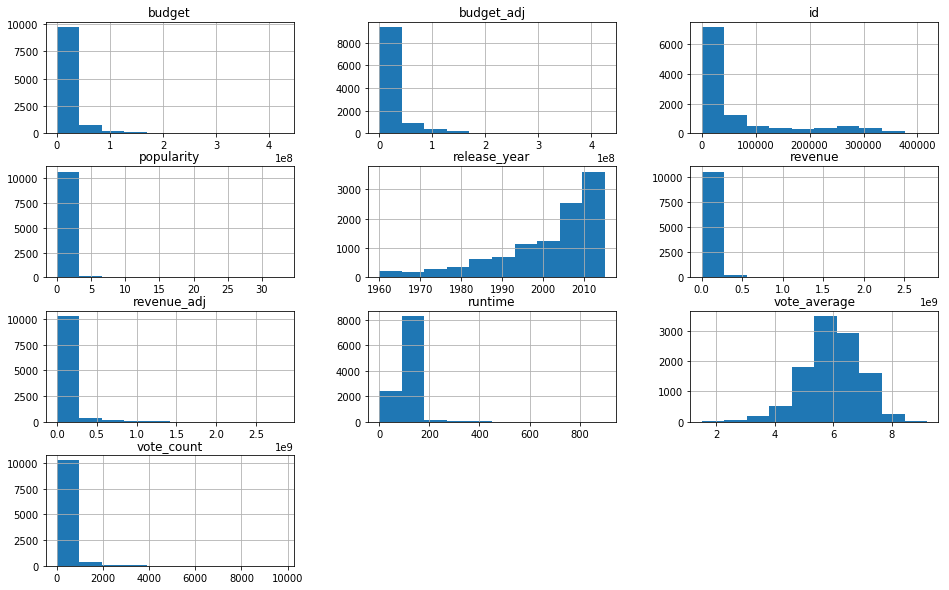

In [78]:
# taking a look ath the data shape in all of the non-categorical columns in the dataset.
movie_df.hist(figsize=(16, 10));

In [79]:
# checking the number of duplicates in the dataset
movie_df.duplicated().sum()

1

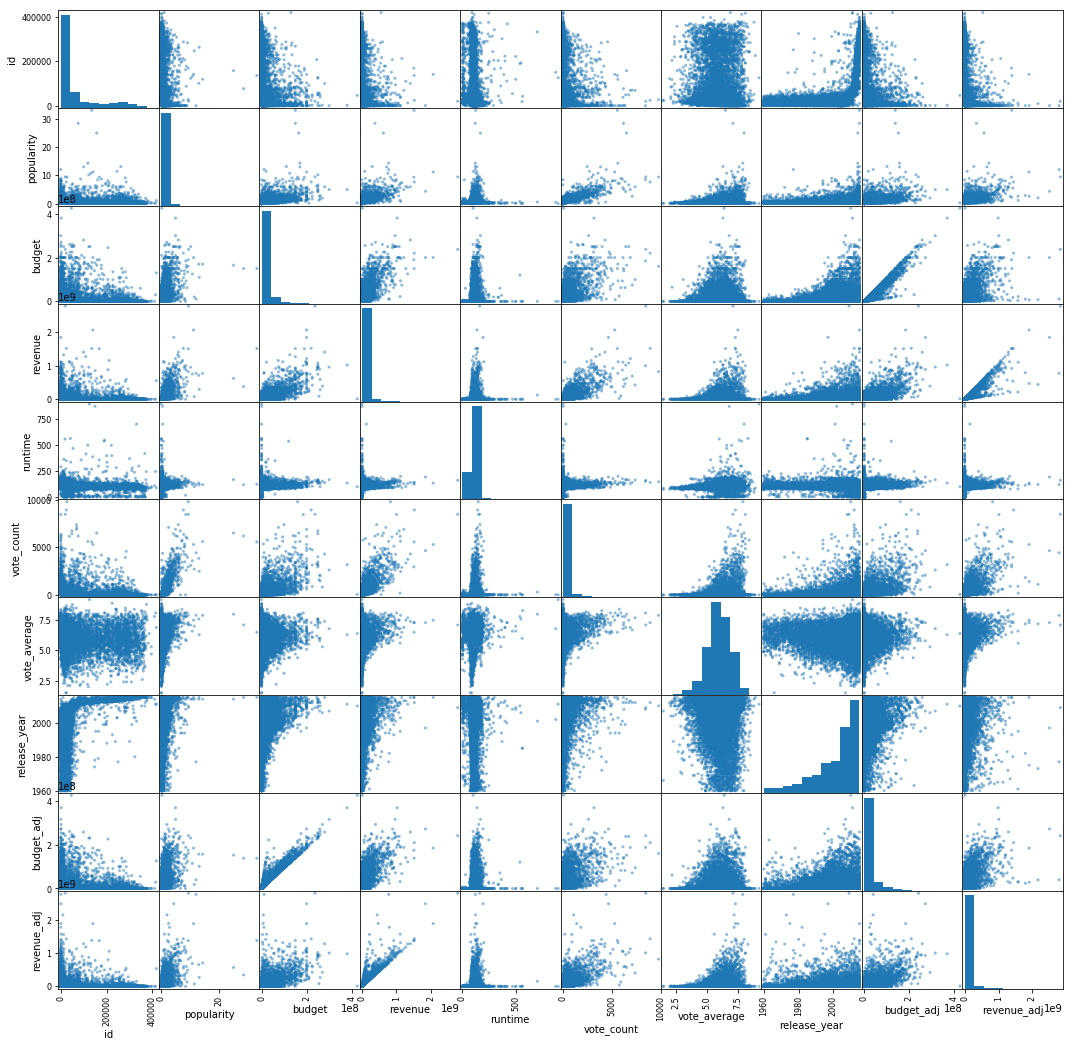

In [81]:
# taking an eye view of of any form of relationship among variables in the dataset.
pd.plotting.scatter_matrix(movie_df, figsize= (18,18));


### Data Cleaning


In [84]:
# dropping the duplicates in the dataset
movie_df.drop_duplicates(inplace= True)

I will be dropping columns that can not help me answer the questions I posed earlier and are hereby irrelevant to my analysis -'id','imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date', 'director', 'vote_count'.

I will be dropping the budget and revenue columns because budget_adj and revenue_adj columnns accounts for inflation over time. Hence, it is more helpful when comparing monetary values accross time.

In [85]:
#dropping columns that are not relevant to the analysis
movie_df.drop(['id','imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date', 'director', 'vote_count'], axis= 1, inplace= True)

In [86]:
# checking to see that the changes made has taken effect.
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 6 columns):
popularity      10865 non-null float64
runtime         10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
budget_adj      10865 non-null float64
revenue_adj     10865 non-null float64
dtypes: float64(4), int64(2)
memory usage: 594.2 KB


Since 15 columns have been deleted from the original dataset, there are just 5 left.

<br> The next thing I will be doing is to create and add new columns that will help me answer my questions to the dataset.

In [92]:
# I created a new column named 'profit' which is gotten by deducting the budget_adj column from the revenue_adj column
movie_df['profit'] = movie_df.revenue_adj - movie_df.budget_adj

In [87]:
# here, I will be creating a column that categorizes vote_average into ratings
# so I will be checking out the decription of the vote_average column so I can create a bin_edge out of it.
movie_df.vote_average.describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [88]:
# After getting the neccesary details needed, I will create a bin edge and bin name.
bin_edge = [0, 1.5, 5.4, 6, 6.6, 9.2]
bin_name = ['1-star', '2-star', '3-star', '4-star', '5-star']

In [89]:
# here I am creating a new column names 'movie_rating' and usinf the .cut() function.
movie_df['movie_rating'] = pd.cut(movie_df['vote_average'], bin_edge, labels= bin_name)

In [93]:
#checking if the column has been added.
movie_df.head()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj,movie_rating,profit
0,32.985763,124,6.5,2015,1.379999e+08,1.392446e+09,4-star,1.254446e+09
1,28.419936,120,7.1,2015,1.379999e+08,3.481613e+08,5-star,2.101614e+08
2,13.112507,119,6.3,2015,1.012000e+08,2.716190e+08,4-star,1.704191e+08
3,11.173104,136,7.5,2015,1.839999e+08,1.902723e+09,5-star,1.718723e+09
4,9.335014,137,7.3,2015,1.747999e+08,1.385749e+09,5-star,1.210949e+09


The data cleaning process is complete and I am ready to move into the EDA stage.

<a id='eda'></a>
## Exploratory Data Analysis



### Find out which movie rating has the highest profit, budget, popularity,  and runtime.

To answer the question above, I will be grouping the dataset by the dependent variable(movie_rating) and then finding their mean with respect to each of the independent variables(profit, budget, popularity and runtime).

In [19]:
# Using the groupby function group each movie rating category and calculate its mean profit.
movie_df.groupby('movie_rating').mean().profit


movie_rating
1-star   -6.382114e+04
2-star    3.372628e+06
3-star    2.387843e+07
4-star    4.257702e+07
5-star    6.890387e+07
Name: profit, dtype: float64

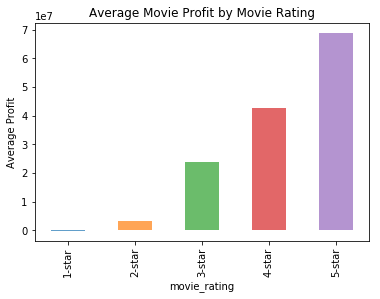

In [95]:
#plot a graph that shows the above.
movie_df.groupby('movie_rating').mean().profit.plot(kind = 'bar', title= 'Average Movie Profit by Movie Rating', alpha= .7)
plt.ylabel('Average Profit');


Here, movies with 1-star rating were at a loss which is depicted by the negative sign and the most profitable movies tend to be the one with the 5-star ratings.

In [20]:
# Using the groupby function group each movie rating category and calculate its mean budget.
movie_df.groupby('movie_rating').mean().budget_adj

movie_rating
1-star    6.382114e+04
2-star    1.230546e+07
3-star    1.825773e+07
4-star    2.107264e+07
5-star    1.896585e+07
Name: budget_adj, dtype: float64

Text(0,0.5,'Average Budget')

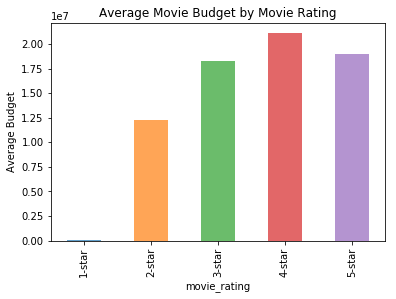

In [30]:
movie_df.groupby('movie_rating').mean().budget_adj.plot(kind = 'bar', title= 'Average Movie Budget by Movie Rating', alpha= .7)
plt.ylabel('Average Budget')


Movies with 1-star rating have relatively the lowest budget when compared with other ratings. However, 4-star movies have the highest mean value when it comes to movie budgets.

In [21]:
# Using the groupby function group each movie rating category and calculate its mean popularity.
movie_df.groupby('movie_rating').mean().popularity

movie_rating
1-star    0.078520
2-star    0.420572
3-star    0.555395
4-star    0.705920
5-star    0.930673
Name: popularity, dtype: float64

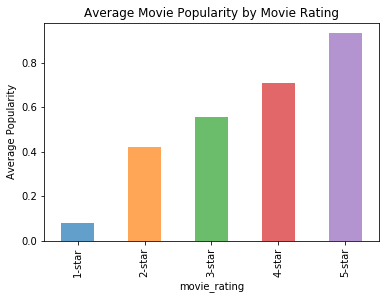

In [31]:
movie_df.groupby('movie_rating').mean().popularity.plot(kind = 'bar', title= 'Average Movie Popularity by Movie Rating', alpha= .7)
plt.ylabel('Average Popularity');

5-star movies seems to be the most popular movies accross the movie rating category.

In [33]:
# Using the groupby function group each movie rating category and calculate the average runtime.
movie_df.groupby('movie_rating').mean().runtime

movie_rating
1-star     80.000000
2-star     95.380672
3-star    100.992484
4-star    105.162587
5-star    107.414663
Name: runtime, dtype: float64

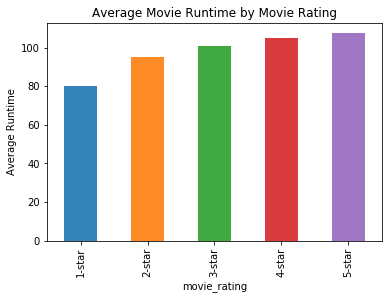

In [72]:
movie_df.groupby('movie_rating').mean().runtime.plot(kind = 'bar', title= 'Average Movie Runtime by Movie Rating', alpha= .9)
plt.ylabel('Average Runtime');

It seems that 5-star rated movies have the highest average runtime when compared with all others.

### Compare movie revenue for films released between 1996 and 2005, as well as 2006 and 2015.

Here, I will filter out and create a table for movies from 1996 to 2005 and 2006 to 2015. Then, i will calculate the aggregate sum of the revenue of both categories.

In [98]:
#filter out movies released within the stipulated time and get the aggregate sum of the revenue.
#first add the movie revenue for films released from 1996 and 2005
first_period = movie_df[(movie_df.release_year > 1995) & (movie_df.release_year <= 2005)]
first_period.head()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj,movie_rating,profit
2409,8.947905,139,8.1,1999,8.247033e+07,1.320229e+08,5-star,4.955256e+07
2410,7.753899,136,7.8,1999,8.247033e+07,6.067687e+08,5-star,5.242984e+08
2411,3.555720,122,7.7,1999,1.963579e+07,4.664111e+08,5-star,4.467753e+08
2412,3.526029,136,6.3,1999,1.505411e+08,1.209981e+09,4-star,1.059439e+09
2413,2.943770,124,6.3,1999,1.047242e+08,5.444161e+08,4-star,4.396919e+08


In [57]:
#calculate the total revenue for the period
total_revenue_1 = first_period.revenue_adj.sum()

In [59]:
#next, add up the movie revenue for the second period which is from 2006 to 2015.
second_period = movie_df[(movie_df.release_year > 2005) & (movie_df.release_year <= 2015)]
second_period.head()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj,profit,movie_rating
0,32.985763,124,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,4-star
1,28.419936,120,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,5-star
2,13.112507,119,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,4-star
3,11.173104,136,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,5-star
4,9.335014,137,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,5-star


In [100]:
#calculate the total revenue for the second period
total_revenue_2 = second_period.revenue_adj.sum()


In [108]:
# plot a graph that shows and compare both categories. 
# these are the bins that will be used for the graphs.
location = [1, 2]
periods = ['1996 - 2005', '2006 - 2015']
total_revenue = [total_revenue_1, total_revenue_2]
colors = ['green', 'orange']

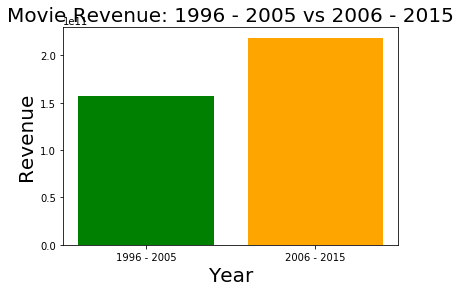

In [109]:
#plotting the graph using matplotlib.
plt.bar(location, total_revenue, color= colors, tick_label= periods)
plt.title('Movie Revenue: 1996 - 2005 vs 2006 - 2015', fontsize= 20)
plt.xlabel('Year',fontsize= 20)
plt.ylabel('Revenue',fontsize= 20);

<a id='conclusions'></a>
## Conclusions

1. Based on the data presented above, 5-star movies are more popular and profitable than any other movie rating category.

2. The revenue generated by films has increased dramatically in the last ten years when compared to the revenue generated from 1996 to 2005.


## Limitations

1. The budget and revenue columns contains alot of rows with zero values.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])